<a href="https://colab.research.google.com/github/AyaElshazly/Applied-Machine-Learning/blob/main/Group4_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2**

## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from math import ceil
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_scor

## a) Load the dataset, preprocess it, perform feature selection, and split it into train and test subsets



In [ ]:
# Load dataset
dataset = pd.read_csv('/content/KDD.csv')
# print shape of dataset
print("Shape of dataset",dataset.shape)
# show the first five rows
dataset

Shape of dataset (494021, 39)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494017,0,282,2286,0,0,0,0,0,1,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494018,0,203,1200,0,0,0,0,0,1,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494019,0,291,1200,0,0,0,0,0,1,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [ ]:
# check missing values
dataset.isna().sum()
# dataset.dropna()

duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

In [ ]:
# function to process dataset
def preprocess_data(df):
    # Drop rows with missing values as ValueError: Input X contains NaN.
    #df = df.dropna()
    # Separate the input features (X) and target variable (Y)
    # Select all columns except the last one
    X = df.iloc[:, :-1]
    # Select the last column
    Y = df.iloc[:, -1]
    #  view 38 input feature variables and 1 target
    print("The feature variables:",X.shape[1])
    print("The shape of target:",Y.shape)
    # Normalize the input features using MinMaxScaler
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    # Perform filter-based feature selection
    # Select top 9 features
    selector = SelectKBest(mutual_info_classif, k=9)
    X_selected = selector.fit_transform(X_normalized, Y)
    # Create a new DataFrame with selected features
    selected_features = selector.get_support(indices=True)
    selected_columns = df.columns[selected_features].tolist()
    my_data = pd.DataFrame(X_selected, columns=selected_columns)
    # Add the target column
    my_data['target'] = Y
    return my_data, X_selected, Y, selected_columns
# Preprocess data
my_data, X_selected, Y,selected_columns = preprocess_data(dataset)

The feature variables: 38
The shape of target: (494021,)


In [ ]:
# Display the first five rows of my_data
my_data.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target
0,2.610418e-07,0.001057,1.0,0.015656,0.015656,0.035294,0.035294,0.11,0.0,0
1,3.446905e-07,0.000094,1.0,0.015656,0.015656,0.074510,0.074510,0.05,0.0,0
2,3.389216e-07,0.000259,1.0,0.015656,0.015656,0.113725,0.113725,0.03,0.0,0
3,3.158461e-07,0.000259,1.0,0.011742,0.011742,0.152941,0.152941,0.03,0.0,0
4,3.129617e-07,0.000394,1.0,0.011742,0.011742,0.192157,0.192157,0.02,0.0,0


## b) Split my_data into three subsets (my data 1 with 70% train & 30% test data, my data 2 with 60%train & 40% test data, my data 3 with 50%train & 50% test data) using different train-test ratios and compute the performance of the Decision Tree classifier for each subset

In [ ]:
# function to split data into subsets
def split_data(X_selected,Y,train_ratio, test_ratio):
    X = X_selected
    Y = Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_ratio, test_size=test_ratio, random_state=0)
    return X_train, X_test, Y_train, Y_test

In [ ]:
# function to plot the confusion matrix
def plot_confusion_matrix(cm):
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [ ]:
# function for evaluation
def evaluate_classification(clf, X_test, Y_test):
    Y_pred = clf.predict(X_test)
    report = classification_report(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    confusion = confusion_matrix(Y_test, Y_pred)
    return report, accuracy, confusion

In [ ]:
# function to compute performance of DT in terms of Classification report using 3 subsets
def compute_DT_performance():
  # Define the train and test ratios
  train_ratios = [0.7, 0.6, 0.5]
  test_ratios = [0.3, 0.4, 0.5]
  i=1
  for train_ratio, test_ratio in zip(train_ratios, test_ratios):
      # Split the data into training and testing subsets
      X_train, X_test, Y_train, Y_test = split_data(X_selected,Y,train_ratio, test_ratio)
      # Perform further operations with the subsets, such as training and evaluating the decision tree
      clf = DecisionTreeClassifier()
      clf.fit(X_train, Y_train)
      # Make predictions on the test set and evaluate performance
      Y_pred = clf.predict(X_test)
      report, accuracy, confusion = evaluate_classification(clf, X_test, Y_test)
      print(f"my_data_{i}")
      # Print the results
      print(f"Train Ratio: {train_ratio}, Test Ratio: {test_ratio}")
      print("Classification Report:")
      print(report)
      print()
      i+=1
# call the compute_DT_performance
compute_DT_performance()

my_data_1
Train Ratio: 0.7, Test Ratio: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29163
           1       1.00      1.00      1.00    119044

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207


my_data_2
Train Ratio: 0.6, Test Ratio: 0.4
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38962
           1       1.00      1.00      1.00    158647

    accuracy                           1.00    197609
   macro avg       1.00      1.00      1.00    197609
weighted avg       1.00      1.00      1.00    197609


my_data_3
Train Ratio: 0.5, Test Ratio: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48796
           1       1.00      1.00 

## c) Visualize the best split of the Decision Tree

In [ ]:
# function to visualize decision tree model
def visualize_decision_tree(clf, feature_names, class_names):
    plt.figure(figsize=(10, 6))
    plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
    plt.show()

In [ ]:
# function to train the decision tree model and visualize the best split of the Decision tree
def train_decision_tree():
    # Define the train and test ratios
    train_ratios = [0.7, 0.6, 0.5]
    test_ratios = [0.3, 0.4, 0.5]
    # Define max depths as assumed
    max_depths = [4, 6, 8]
    i = 1
    for train_ratio, test_ratio in zip(train_ratios, test_ratios):
      # Split the data into training and testing subsets
      X_train, X_test, Y_train, Y_test = split_data(X_selected,Y,train_ratio, test_ratio)
      for max_depth in max_depths:
        # Initialize and train the Decision Tree classifier
        clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy',max_leaf_nodes=ceil((2**max_depth)*0.1+1))
        clf.fit(X_train, Y_train)
        # Plot the decision tree
        plt.figure(figsize=(10, 6))
        plot_tree(clf, filled=True, feature_names= my_data.columns[:-1], class_names=['normal', 'attack'])
        plt.title(f"my_data_{i},Max Depth: {max_depth}, Train Ratio: {train_ratio}, Test Ratio: {test_ratio}")
        plt.show()

In [ ]:
# function to train the decision tree model and visualize the best split of the Decision tree
def train_decision_tree():
    # Define the train and test ratios
    train_ratios = [0.7, 0.6, 0.5]
    test_ratios = [0.3, 0.4, 0.5]
    # Define max depths as assumed
    max_depths = [4, 6, 8]
    i = 0
    for max_depth in max_depths:
        for j in range(3):
            train_ratio = train_ratios[j]
            test_ratio = test_ratios[j]
            # Split the data into training and testing subsets
            X_train, X_test, Y_train, Y_test = split_data(X_selected,Y,train_ratio, test_ratio)
            # Initialize and train the Decision Tree classifier
            clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy',max_leaf_nodes=ceil((2**max_depth)*0.1+1))
            clf.fit(X_train, Y_train)
            # Plot the decision tree
            plt.figure(figsize=(10, 6))
            plot_tree(clf, filled=True, feature_names=my_data.columns[:-1], class_names=['normal', 'attack'])
            n = j + 1
            plt.title(f"my_data_{n}, Max Depth: {max_depth}, Train Ratio: {train_ratio}, Test Ratio: {test_ratio}")
            plt.show()
            i += 1

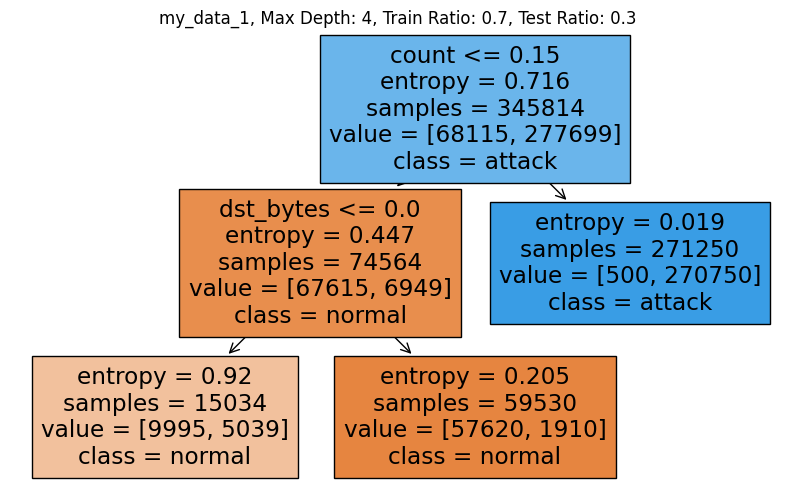

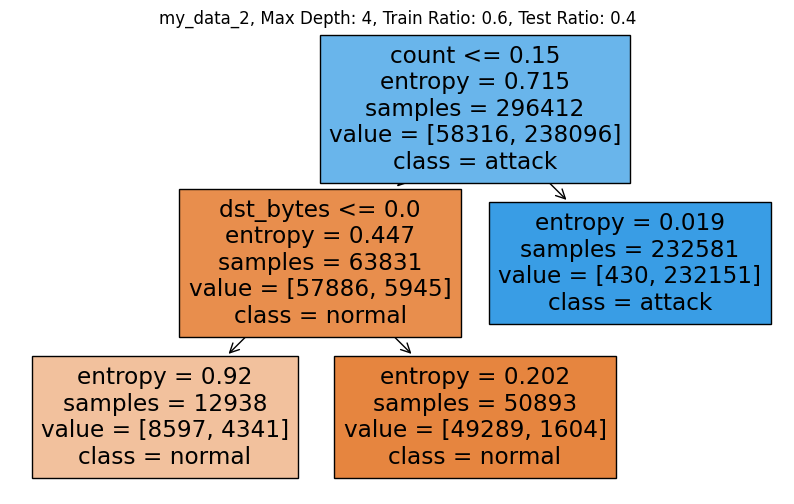

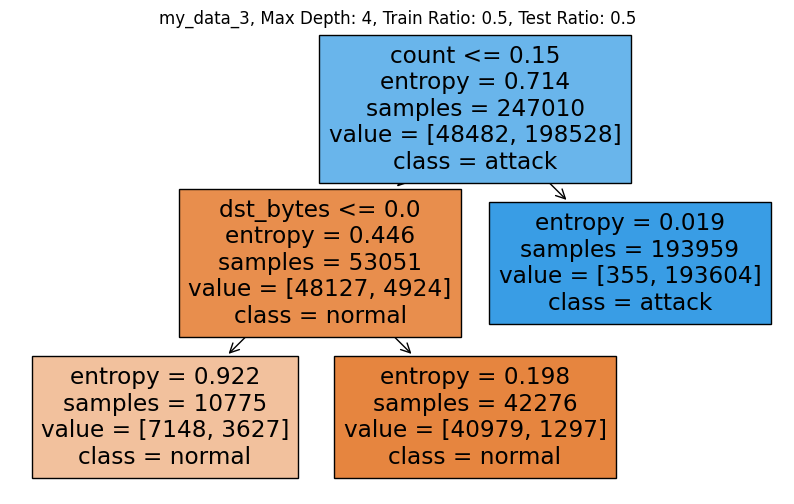

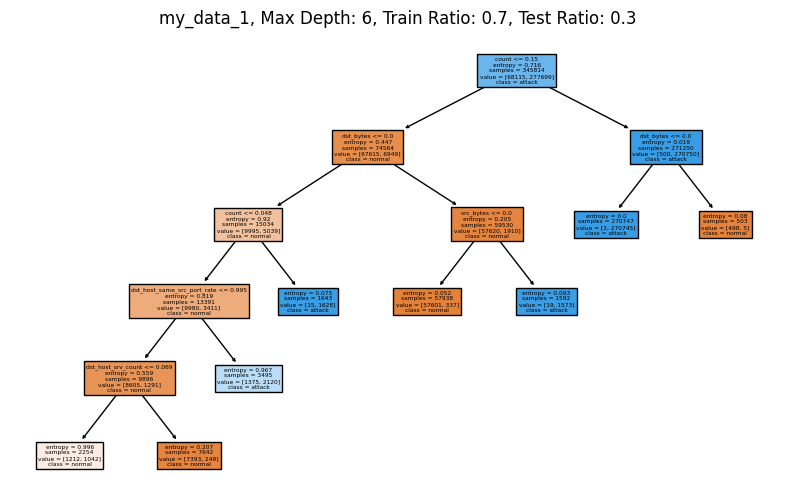

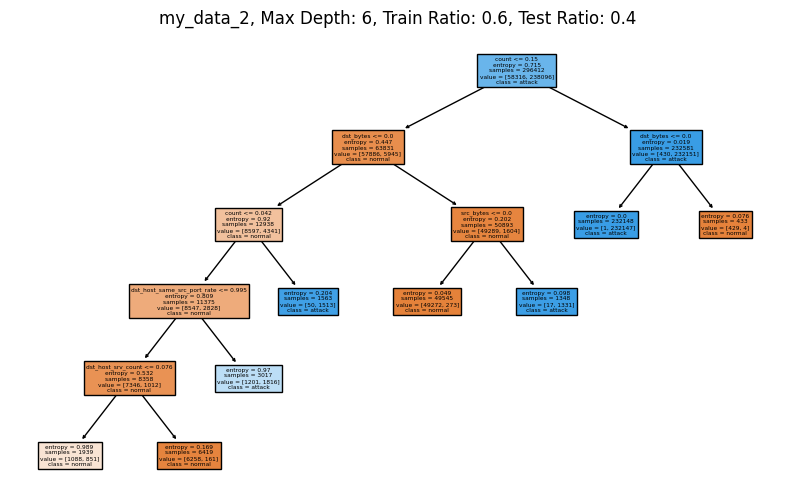

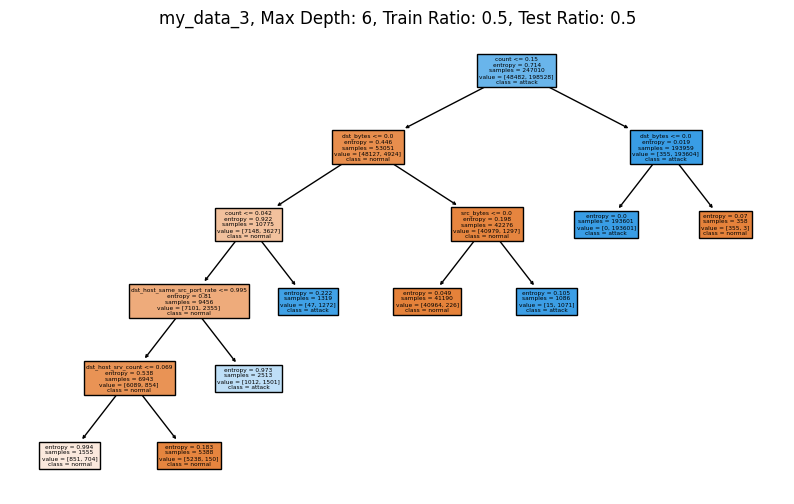

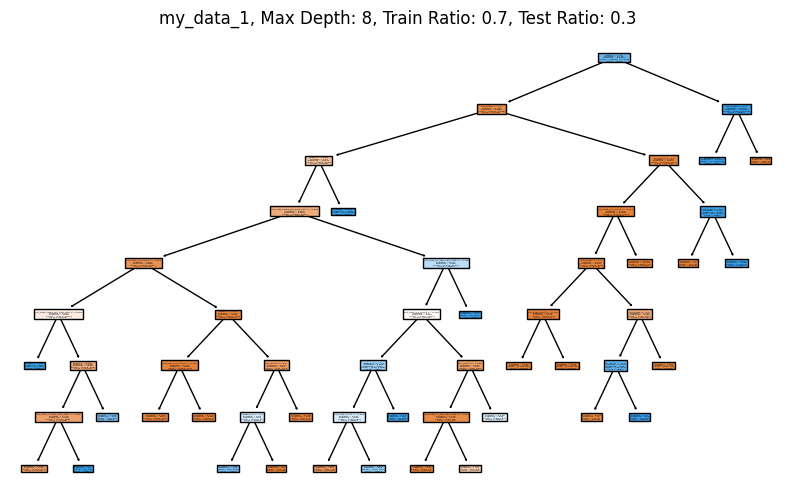

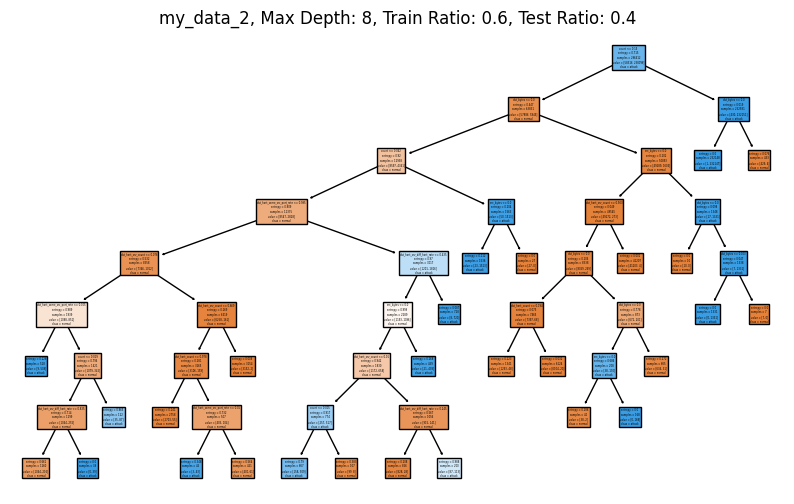

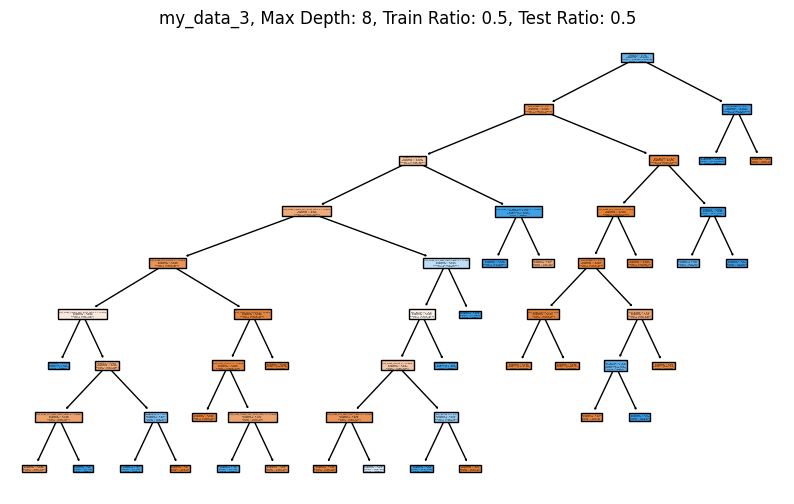

In [ ]:
train_decision_tree()

## d) Compute and compare the classification performance of the tuned Decision Tree for each test size and display the accuracy scores, classification report, and confusion matrix

In [ ]:
# function to compute and compare tuned DT
def compare_tuned_decision_tree_performance(train_ratio, test_ratio):
    X_train, X_test, Y_train, Y_test = split_data(X_selected,Y, train_ratio, test_ratio)
    max_depths = [4, 6, 8]
    data_labels = {0.3: "my_data_1", 0.4: "my_data_2", 0.5: "my_data_3"}
    data_label = data_labels[test_ratio]
    for max_depth in max_depths:
        # Initialize and train the Decision Tree classifier
        clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy',max_leaf_nodes=ceil((2**max_depth)*0.1+1))
        clf.fit(X_train, Y_train)
        # Make predictions on the test set
        Y_pred = clf.predict(X_test)
        report, accuracy, confusion = evaluate_classification(clf, X_test, Y_test)
        # Generate classification report and confusion matrix
        print(f"{data_label}, Max Depth: {max_depth}, Test Ratio: {test_ratio}")
        print("Accuracy:", accuracy)
        print("Classification Report:")
        print(report)
        print(f"Confusion Matrix with: Max Depth: {max_depth}, {test_ratio} test data")
        print()
        plot_confusion_matrix(confusion)
        print()

my_data_1, Max Depth: 4, Test Ratio: 0.3
Accuracy: 0.9789078788451288
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29163
           1       1.00      0.98      0.99    119044

    accuracy                           0.98    148207
   macro avg       0.95      0.98      0.97    148207
weighted avg       0.98      0.98      0.98    148207

Confusion Matrix with: Max Depth: 4, 0.3 test data



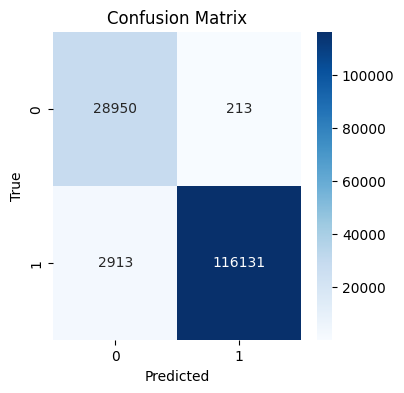


my_data_1, Max Depth: 6, Test Ratio: 0.3
Accuracy: 0.9910665488134839
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29163
           1       0.99      0.99      0.99    119044

    accuracy                           0.99    148207
   macro avg       0.99      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207

Confusion Matrix with: Max Depth: 6, 0.3 test data



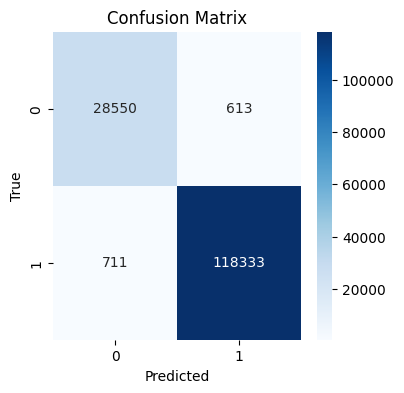


my_data_1, Max Depth: 8, Test Ratio: 0.3
Accuracy: 0.9966533294648701
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29163
           1       1.00      1.00      1.00    119044

    accuracy                           1.00    148207
   macro avg       0.99      1.00      0.99    148207
weighted avg       1.00      1.00      1.00    148207

Confusion Matrix with: Max Depth: 8, 0.3 test data



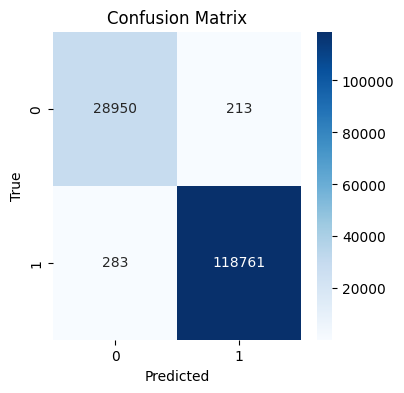


my_data_2, Max Depth: 4, Test Ratio: 0.4
Accuracy: 0.9787459073220349
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     38962
           1       1.00      0.98      0.99    158647

    accuracy                           0.98    197609
   macro avg       0.95      0.98      0.97    197609
weighted avg       0.98      0.98      0.98    197609

Confusion Matrix with: Max Depth: 4, 0.4 test data



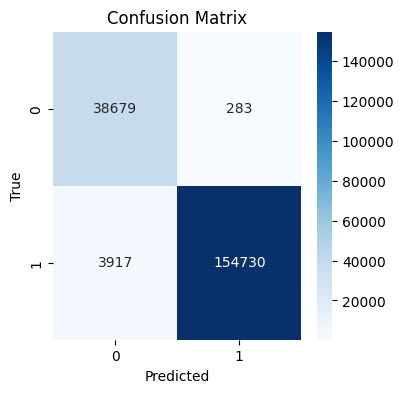


my_data_2, Max Depth: 6, Test Ratio: 0.4
Accuracy: 0.9913364269846009
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     38962
           1       0.99      0.99      0.99    158647

    accuracy                           0.99    197609
   macro avg       0.99      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609

Confusion Matrix with: Max Depth: 6, 0.4 test data



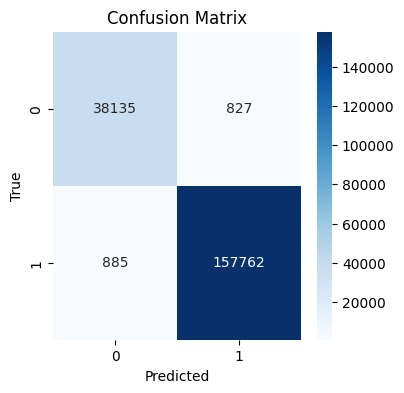


my_data_2, Max Depth: 8, Test Ratio: 0.4
Accuracy: 0.9971661209762713
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     38962
           1       1.00      1.00      1.00    158647

    accuracy                           1.00    197609
   macro avg       0.99      1.00      1.00    197609
weighted avg       1.00      1.00      1.00    197609

Confusion Matrix with: Max Depth: 8, 0.4 test data



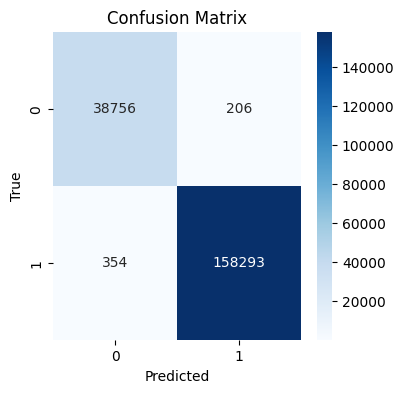


my_data_3, Max Depth: 4, Test Ratio: 0.5
Accuracy: 0.9785596592864285
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     48796
           1       1.00      0.98      0.99    198215

    accuracy                           0.98    247011
   macro avg       0.95      0.98      0.97    247011
weighted avg       0.98      0.98      0.98    247011

Confusion Matrix with: Max Depth: 4, 0.5 test data



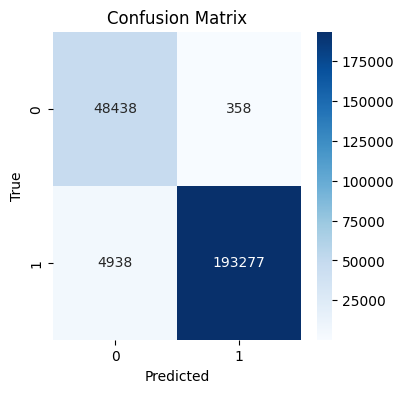


my_data_3, Max Depth: 6, Test Ratio: 0.5
Accuracy: 0.9914457250891661
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     48796
           1       0.99      0.99      0.99    198215

    accuracy                           0.99    247011
   macro avg       0.99      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011

Confusion Matrix with: Max Depth: 6, 0.5 test data



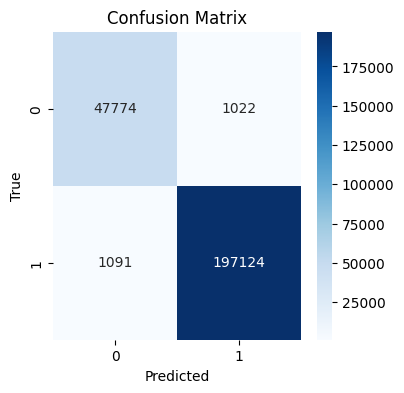


my_data_3, Max Depth: 8, Test Ratio: 0.5
Accuracy: 0.9975102323378311
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     48796
           1       1.00      1.00      1.00    198215

    accuracy                           1.00    247011
   macro avg       0.99      1.00      1.00    247011
weighted avg       1.00      1.00      1.00    247011

Confusion Matrix with: Max Depth: 8, 0.5 test data



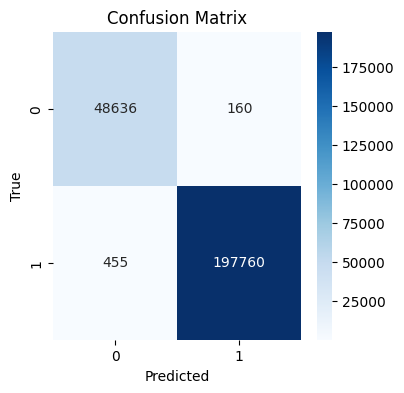

In [ ]:
# Compare tuned decision tree performance for different test ratios
compare_tuned_decision_tree_performance(0.7, 0.3)
compare_tuned_decision_tree_performance(0.6, 0.4)
compare_tuned_decision_tree_performance(0.5, 0.5)

## e) Train the Decision Tree with parameters of our choice, calculate the F1 scores for both train and test data, and then apply three mitigation strategies: pre-pruning, post-pruning, and k-fold cross-validation.

In [ ]:
# Initialize lists to store accuracy scores
train_scores = []
test_scores = []
# determine features and target
X = my_data.iloc[:, :-1]
y = my_data['target']
# Split the data into training and testing sets with 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

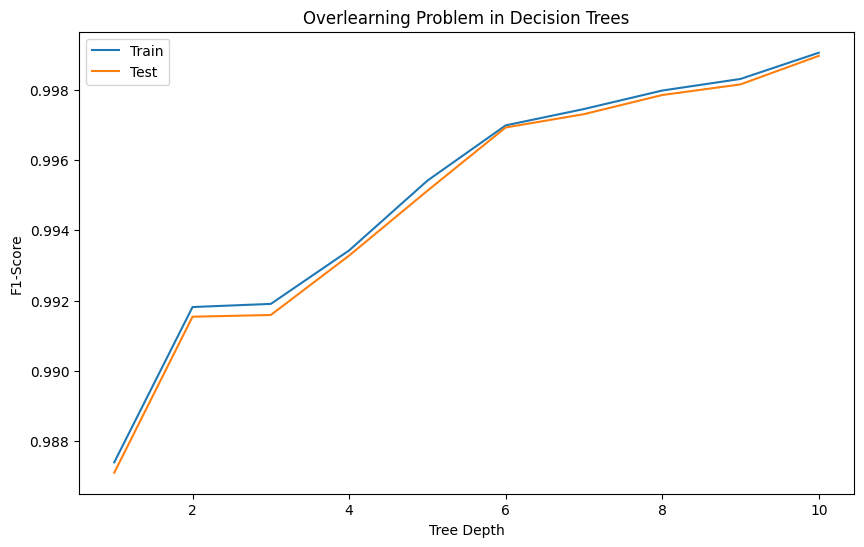

In [ ]:
# Set maximum depth to 11
depth = range(1,11)
#print(depth)
# Initialize lists to store f1 scores
original_train_scores = []
original_test_scores = []

for dep in depth:
  # Create a decision tree classifier
  classifier = DecisionTreeClassifier(max_depth=dep,min_samples_leaf= 3, min_samples_split= 12, random_state=42)
  # Fit the classifier on the training data
  classifier.fit(X_train, y_train)
  # Evaluate the model
  train_score = f1_score(y_train,classifier.predict(X_train))
  test_score = f1_score(y_test,classifier.predict(X_test))
  # Append the scores to the lists
  original_train_scores.append(train_score)
  original_test_scores.append(test_score)
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(depth, original_train_scores, label='Train')
plt.plot(depth, original_test_scores, label='Test')
plt.xlabel('Tree Depth')
plt.ylabel('F1-Score')

plt.title('Overlearning Problem in Decision Trees')
plt.legend()
plt.show()

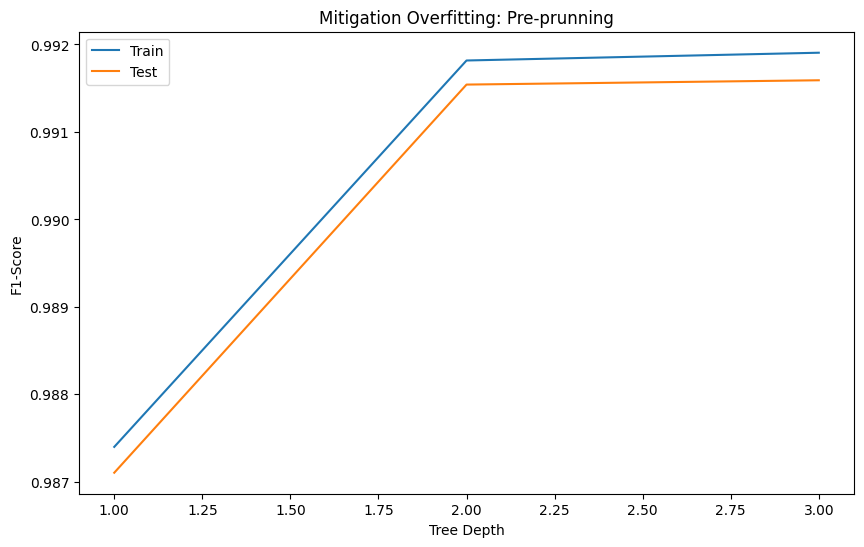

In [ ]:
#Mitigation for overfitting : Pre-prunning: Limit the maximum depth of the tree, min_samples_leaf and min_samples_split
# Initialize lists to store f1 scores
pre_pruning_train_scores = []
pre_pruning_test_scores = []

# Set maximum depth to 4
depth = range(1,4)
for dep in depth:
  # Create a decision tree classifier with pre-pruning
  clf=DecisionTreeClassifier(max_depth=dep,min_samples_leaf= 1,min_samples_split= 2,random_state=42)
  # Fit the classifier on the training data
  clf.fit(X_train, y_train)
  # Evaluate the model
  train_score = f1_score(y_train,clf.predict(X_train))
  test_score = f1_score(y_test,clf.predict(X_test))
  # Append the scores to the lists
  pre_pruning_train_scores.append(train_score)
  pre_pruning_test_scores.append(test_score)
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(depth, pre_pruning_train_scores, label='Train')
plt.plot(depth, pre_pruning_test_scores, label='Test')
plt.xlabel('Tree Depth')
plt.ylabel('F1-Score')
plt.title('Mitigation Overfitting: Pre-prunning')
plt.legend()
plt.show()

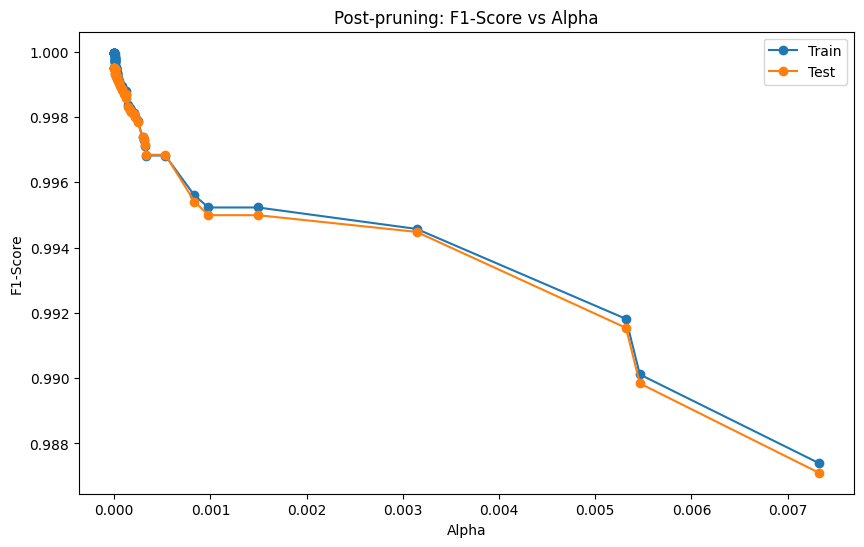

In [ ]:
#Post-pruning: Use cost-complexity pruning
# Create a decision tree classifier without pruning
clf = DecisionTreeClassifier(random_state=42)
# Fit the classifier on the training data
clf.fit(X_train, y_train)
# Apply cost complexity pruning
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1] # Exclude the maximum alpha
post_pruning_train_scores  = []
post_pruning_test_scores  = []
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
  clf.fit(X_train, y_train)
  clfs.append(clf)
  post_pruning_train_scores.append(f1_score(y_train,clf.predict(X_train)))
  post_pruning_test_scores.append(f1_score(y_test,clf.predict(X_test)))
# Plot the test and train accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, post_pruning_train_scores, marker='o', label='Train')
plt.plot(ccp_alphas, post_pruning_test_scores, marker='o', label='Test')
plt.xlabel("Alpha")
plt.ylabel("F1-Score")
plt.title("Post-pruning: F1-Score vs Alpha")
plt.legend()
plt.show()

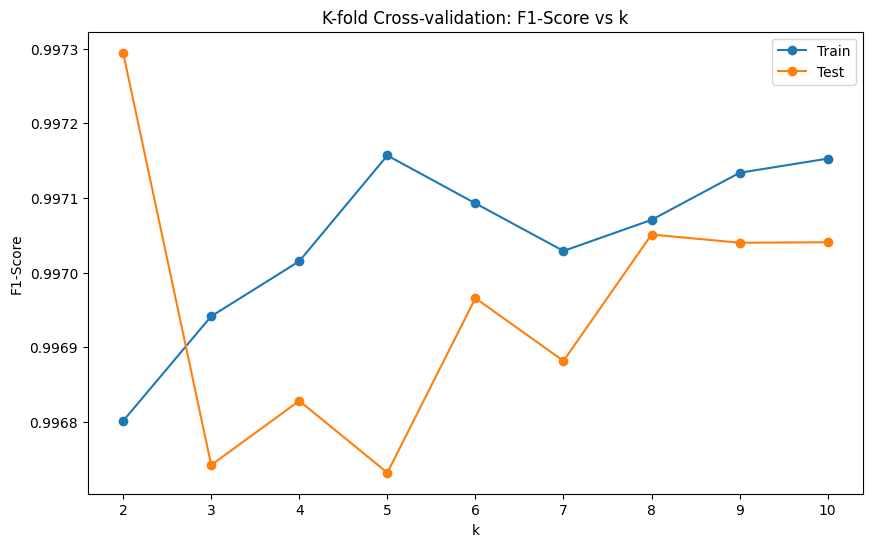

In [ ]:
# Perform k-fold cross-validation
# Try different values of k
k_values = range(2, 11)
k_fold_train_scores = []
k_fold_test_scores = []
for k in k_values:
  train_scores = cross_val_score(classifier, X_train, y_train, cv=k, scoring='f1_macro')
  test_scores = cross_val_score(classifier, X_test, y_test, cv=k, scoring='f1_macro')
  k_fold_train_scores.append(np.mean(train_scores))
  k_fold_test_scores.append(np.mean(test_scores))
# Plot the mean test and train accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_fold_train_scores, marker='o', label='Train')
plt.plot(k_values, k_fold_test_scores, marker='o', label='Test')
plt.xlabel("k")
plt.ylabel("F1-Score")
plt.title("K-fold Cross-validation: F1-Score vs k")
plt.legend()
plt.show()